# <p><center>Parking-Lot available parking space detection </center></p>
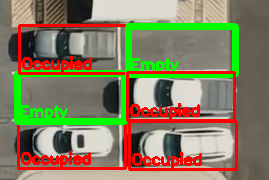
</br>
Yoav Senderovitz : 27/05/2023
<hr>

# <p><center>מטרת המחקר</center></p>
<p style="text-align: center;"> מטרת המחקר היא לעזור לאנשים למצוא מקום חניה בצורה יעילה יותר </p>
<hr>

# <p><center>תיאור הנתונים</center></p>
<p style="text-align: center;">הדאטאסט מורכב משני קבצים הראשון עם תמונות של מקומות חניה פנויים והשני עם תפוסים</p>
<p style="text-align: center;">בקישור לא מתואר מי הכין את הדאטאסט <a href="https://drive.google.com/file/d/11DyZ165lZGzULEZSQNofyy9A8xaYgFJ2/view">Google Drive</a> ניתן למצוא את הדאטאסט</p>
<p style="text-align: center;">ישנם 3045 תמונות של מקומות חניה פנויים וכך גם למקומות החנייה התפוסים</p>
<hr>

# <p><center>חקר הנתונים</center></p>
<p style="text-align: right;">ייבוא הספריות הנחוצות לשני המודלים</p>

In [1]:
import os
import pandas as pd
import pickle
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# First model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Second model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


c:\Users\yoavs\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (3.0.4)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
Dir = r'C:\Users\yoavs\Desktop\another one\clf-data'
categories = ['empty', 'not_empty']

In [3]:
data = [resize(imread(os.path.join(Dir, category, file)), (15, 15)).flatten()
        for category_idx, category in enumerate(categories)
        for file in os.listdir(os.path.join(Dir, category))]

labels = [category_idx
          for category_idx, category in enumerate(categories)
          for file in os.listdir(os.path.join(Dir, category))]

In [4]:
data = np.asarray(data)
labels = np.asarray(labels)

In [7]:
np.save('data.npy', data)


In [8]:
#TODO TO LOAD THE ARRAY: data = np.load('data.npy')

In [105]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [9]:
np.save('labels.npy', labels)

# First Model

# Creating a Test and a Training sets

In [107]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.3, shuffle=True, stratify=labels)

# Train Classifier

In [108]:
Classifier = SVC()

In [109]:
HYPER_PARAMETERS = [{'gamma': [0.01, 0.001, 0.0001] , 'C' : [1, 10, 100, 1000]}]
Search = GridSearchCV(Classifier, HYPER_PARAMETERS)

In [110]:
Search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [112]:
Best_Model = Search.best_estimator_
Best_Model

SVC(C=10, gamma=0.01)

# Test the Model

In [113]:
Preds = Best_Model.predict(X_test)
score = accuracy_score(Preds, y_test)

In [114]:
print('{}%'.format(str(score*100)))

99.94526546250684%


Accuracy: 0.9997263273125342
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1827

    accuracy                           1.00      3654
   macro avg       1.00      1.00      1.00      3654
weighted avg       1.00      1.00      1.00      3654



<AxesSubplot:>

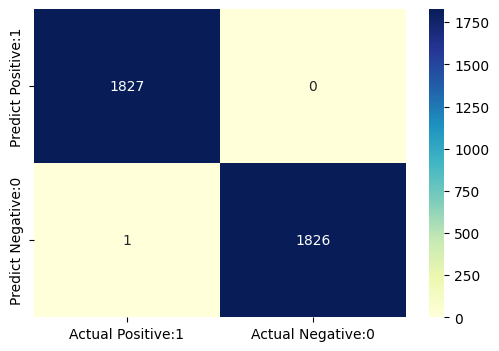

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, Preds)
report = classification_report(y_test, Preds)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, Preds)
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [116]:
pickle.dump(Best_Model, open('./model.h5', 'wb'))

# Try the model

In [97]:
import cv2
import pickle

width, height = 107, 48

try:
    with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'rb') as f:
        posList = pickle.load(f)
except:
    posList = []

if isinstance(posList, SVC):
    posList = []

def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

    with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'wb') as f:
        pickle.dump(posList, f)

while True:
    img = cv2.imread(r'C:\Users\yoavs\Desktop\another one\carParkImg.png')

    if img is None:
        print("Error: Failed to load image")
        break

    for pos in posList:
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (255, 0, 255), 2)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouseClick)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [39]:
import cv2
import cvzone

cap = cv2.VideoCapture(r'C:\Users\yoavs\Desktop\another one\carPark.mp4')

with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'rb') as f:
    posList = pickle.load(f)

width, height = 107, 48

def checkParkingSpace(imgPro):
    spaceCounter = 0

    for pos in posList:
        x, y = pos
 
        imgCrop = imgPro[y:y + height, x:x + width]
        count = cv2.countNonZero(imgCrop)

        if count < 900:
            status = "Empty"
            color = (0, 255, 0)
            thickness = 2
            spaceCounter += 1
        else:
            status = "Occupied"
            color = (0, 0, 255)
            thickness = 2

        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), color, thickness)
        # cvzone.putTextRect(img, str(count), (x, y + height - 3), scale=1,
                        #    thickness=2, offset=0, colorR=color)
        cv2.putText(img, status, (x + 2, y + height - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cvzone.putTextRect(img, f'Free: {spaceCounter}/{len(posList)}', (100, 50), scale=3,
                           thickness=5, offset=20, colorR=(0,200,0))
while True:

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 1)
    imgThreshold = cv2.adaptiveThreshold(imgBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 25, 16)
    imgMedian = cv2.medianBlur(imgThreshold, 5)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.dilate(imgMedian, kernel, iterations=1)

    checkParkingSpace(imgDilate)
    cv2.imshow("Image", img)
    key = cv2.waitKey(1) & 0xFF
    if key  == ord('q'):
        break
cv2.destroyAllWindows()

# Second Model KNN

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)

predicted_y = knn.predict(X_test)
predicted_y_prob = knn.predict_proba(X_test)

print(accuracy_score(y_test, predicted_y)*100)

99.91789819376025


In [51]:
k_neighbors_test_df = pd.DataFrame({"k": [], "accuracy": []})
min_k, max_k, step = 2, 53, 2
# print("calculating...")
for k in range(min_k, max_k+step, step):
    test_knn = KNeighborsClassifier(n_neighbors=k)
    test_knn.fit(X_train, y_train)
    accuracy = test_knn.score(X_test, y_test)
    
    k_neighbors_test_df = k_neighbors_test_df.append(
        {"k": k, "accuracy": accuracy}, ignore_index=True
    )

k_neighbors_test_df

C:\Users\yoavs\AppData\Local\Temp\ipykernel_22620\3502663373.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_neighbors_test_df = k_neighbors_test_df.append(
C:\Users\yoavs\AppData\Local\Temp\ipykernel_22620\3502663373.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_neighbors_test_df = k_neighbors_test_df.append(
C:\Users\yoavs\AppData\Local\Temp\ipykernel_22620\3502663373.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_neighbors_test_df = k_neighbors_test_df.append(
C:\Users\yoavs\AppData\Local\Temp\ipykernel_22620\3502663373.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_neighbors_test_df = k_neighbors_test_df.

,k,accuracy
0,2.0,0.999589
1,4.0,0.999179
2,6.0,0.998768
3,8.0,0.997126
4,10.0,0.994663
5,12.0,0.993842
6,14.0,0.992200
7,16.0,0.991379
8,18.0,0.989737
9,20.0,0.988916


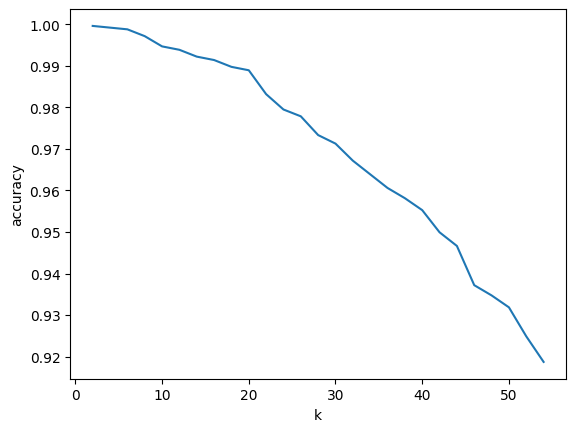

In [62]:
sns.lineplot(data=k_neighbors_test_df, x="k", y="accuracy")
plt.show()

In [53]:
best_row = k_neighbors_test_df.iloc[k_neighbors_test_df["accuracy"].idxmax()]
best_k = int(best_row["k"])
best_acc = best_row["accuracy"]
print(f"Best K: \nk {best_k} with accuracy {round(best_acc*100,3)}%")

Best K: 
k 2 with accuracy 99.959%


In [54]:
KNN = None
if os.path.exists("knn.h5"):
    with open("knn.h5", "rb") as f:
        KNN = pickle.load(f)
else:
    KNN = KNeighborsClassifier(n_neighbors=best_k)
    KNN.fit(X_train, y_train)

In [55]:
if not os.path.exists("knn.h5"):
    with open("knn.h5", "wb") as f:
        pickle.dump(KNN, f)

In [56]:
with open(r'C:\Users\yoavs\Desktop\another one\knn.h5', 'rb') as f:
    loaded_model = pickle.load(f)
    
predictions = loaded_model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9995894909688013
Precision: 1.0
Recall: 0.9991539763113367
F1-score: 0.9995768091409225


In [58]:
preds=loaded_model.predict(X_test)

Accuracy: 0.9995894909688013
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00      1182

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



<AxesSubplot:>

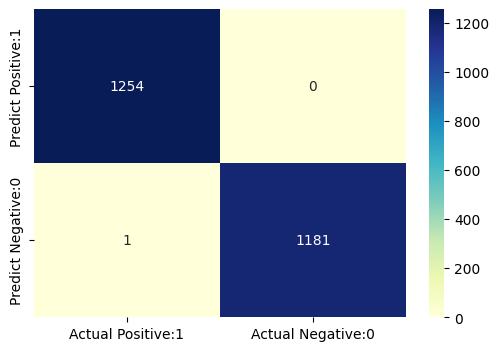

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [90]:
cm

array([[1254,    0],
       [   1, 1181]], dtype=int64)